In [1]:
import pandas as pd
import numpy as np
group = []
file = ['CE.txt', 'CP.txt','SE.txt', 'TS1.txt', 'TS2.txt', 'TS3.txt', 'TS4.txt', \
        'VS1.txt','EPS1.txt','PS1.txt','PS2.txt', 'PS3.txt', 'PS4.txt', 'PS5.txt', \
        'PS6.txt', 'FS1.txt', 'FS2.txt']
for file in file:
    group.append(pd.read_table(file, header=None))
features = pd.concat(group, axis=1)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,47.202,47.273,47.250,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,10.413,10.399,10.397,10.384,10.401,10.407,10.395,10.374,10.379,10.373
1,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,10.438,10.411,10.419,10.414,10.407,10.391,10.427,10.411,10.434,10.391
2,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,10.320,10.352,10.356,10.336,10.338,10.327,10.337,10.350,10.356,10.356
3,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,10.299,10.296,10.283,10.256,10.270,10.272,10.280,10.285,10.267,10.261
4,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,10.199,10.199,10.233,10.245,10.233,10.211,10.205,10.214,10.227,10.216


In [2]:
target = pd.read_table('profile.txt', header=None)
target.head()

,0,1,2,3,4
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1


In [3]:
import matplotlib.pyplot as plt
features[0].plot(figsize=(20,20), subplots=True, layout=(18,1));
plt.show()

<Figure size 2000x2000 with 18 Axes>

In [4]:
features.shape

(2205, 43680)

In [5]:
target.shape

(2205, 5)

In [6]:
import random
#separating our data into train, validation and test sets
random.seed(123)
val = features[:500]
train_final = features[501:1800]
label_val = target[:500]
label_train_final = target[501:1800]
test = features[1801:]
label_test = target[1801:]

In [10]:
import keras
from keras import models, layers, optimizers, regularizers
#designing the neural network
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(43680,))) #1st hidden layer
model.add(layers.Dense(50, activation='relu'))#2nd hidden layer
model.add(layers.Dense(25, activation='relu'))#3rd hidden layer
model.add(layers.Dense(5, activation='softmax'))#output

In [11]:
#compiling the model
model.compile(optimizer='RMSprop',
              loss='mse',
              metrics=['accuracy'])

In [12]:
#saving our model as we fit it will allow us to pull attributes for visualizations
history = model.fit(train_final,
              label_train_final,
              epochs=20,
              batch_size=1000,
              validation_data=(val, label_val))

Train on 1299 samples, validate on 500 samples
Epoch 1/20
1299/1299 [==============================] - 3s 2ms/step - loss: 4364.2296 - acc: 0.5219 - val_loss: 4764.2817 - val_acc: 0.9780
Epoch 2/20
1299/1299 [==============================] - 2s 1ms/step - loss: 4362.8543 - acc: 0.5219 - val_loss: 4764.0034 - val_acc: 0.9780
Epoch 3/20
1299/1299 [==============================] - 2s 1ms/step - loss: 4362.6069 - acc: 0.5219 - val_loss: 4763.9243 - val_acc: 0.9780
Epoch 4/20
1299/1299 [==============================] - 2s 1ms/step - loss: 4362.5355 - acc: 0.5219 - val_loss: 4763.9004 - val_acc: 0.9780
Epoch 5/20
1299/1299 [==============================] - 2s 1ms/step - loss: 4362.5147 - acc: 0.5219 - val_loss: 4763.8936 - val_acc: 0.9780
Epoch 6/20
1299/1299 [==============================] - 2s 1ms/step - loss: 4371.8854 - acc: 0.4072 - val_loss: 4810.0635 - val_acc: 0.0000e+00
Epoch 7/20
1299/1299 [==============================] - 2s 1ms/step - loss: 4381.8205 - acc: 0.2340 - val_los

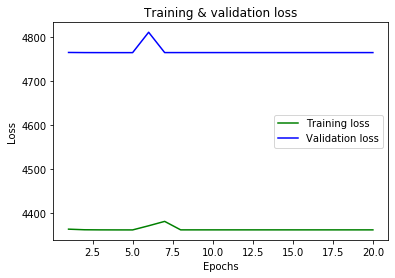

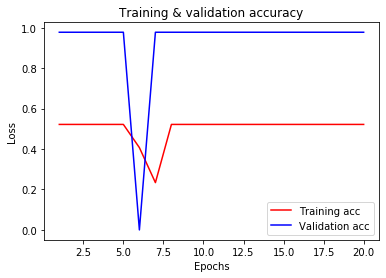

In [13]:
# loss visualization
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'blue', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#accuracy visualization
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'blue', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()